# Diabetes Classification

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# The Data

In [2]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Intital findings:
- There are missing values in 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin' and 'BMI' columns
- There are outliers in Glucose, BloodPressure, BMI, and DiabetesPedigreeFunction

In [5]:
col = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for i in col:
    df[i] = df[i].apply(lambda x: np.NaN if x==0 else x)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [6]:
print('Missing Values')
df.isna().sum()

Missing Values


Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

## Handling Missing Values

In [7]:
df.drop(['Insulin', 'SkinThickness'], axis=1, inplace=True)
df.head()

,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,33.6,0.627,50,1
1,1,85.0,66.0,26.6,0.351,31,0
2,8,183.0,64.0,23.3,0.672,32,1
3,1,89.0,66.0,28.1,0.167,21,0
4,0,137.0,40.0,43.1,2.288,33,1


In [8]:
cols = ['BMI', 'Glucose', 'BloodPressure']
for i in cols:
    df.fillna(df[i].mean(), inplace=True)

In [9]:
df.isna().sum()


Pregnancies                 0
Glucose                     0
BloodPressure               0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [10]:
df.head()

,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,33.6,0.627,50,1
1,1,85.0,66.0,26.6,0.351,31,0
2,8,183.0,64.0,23.3,0.672,32,1
3,1,89.0,66.0,28.1,0.167,21,0
4,0,137.0,40.0,43.1,2.288,33,1


In [11]:
df.corr()

,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.130262,0.179667,0.021565,-0.033523,0.544341,0.221898
Glucose,0.130262,1.000000,0.194197,0.223627,0.138544,0.266752,0.477765
BloodPressure,0.179667,0.194197,1.000000,0.236290,0.028976,0.293926,0.108598
BMI,0.021565,0.223627,0.236290,1.000000,0.153400,0.025519,0.311924
DiabetesPedigreeFunction,-0.033523,0.138544,0.028976,0.153400,1.000000,0.033561,0.173844
Age,0.544341,0.266752,0.293926,0.025519,0.033561,1.000000,0.238356
Outcome,0.221898,0.477765,0.108598,0.311924,0.173844,0.238356,1.000000


<AxesSubplot:>

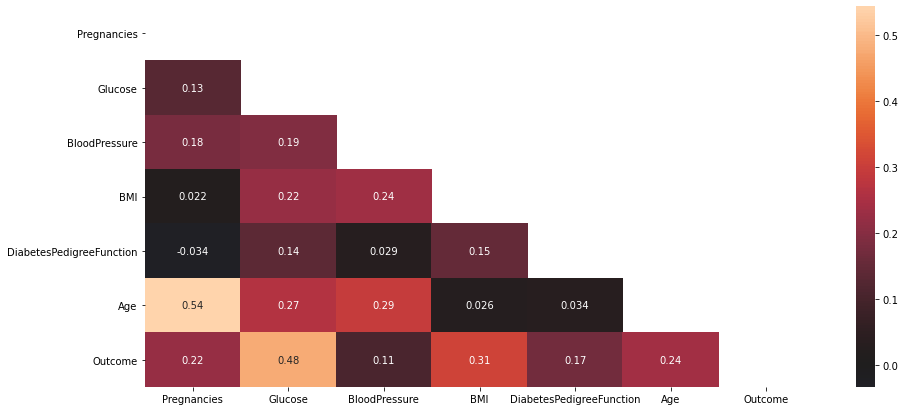

In [12]:
sns.set_palette('magma')
x = np.triu(df.corr())
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(), mask = x, annot=True, center=0)

In [13]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'BMI',
       'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

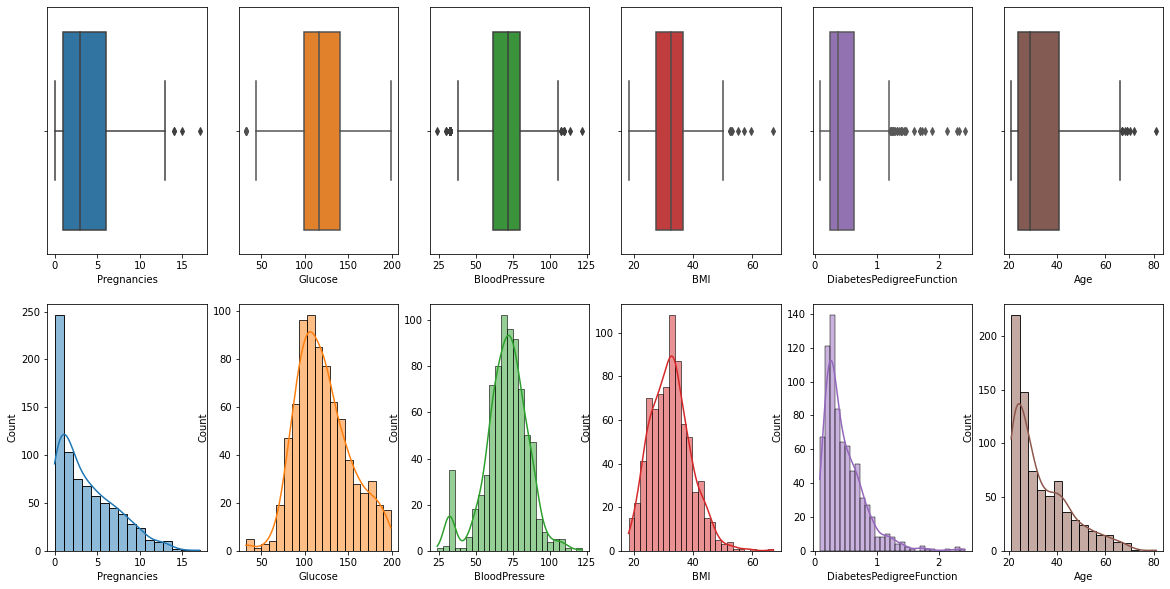

In [14]:
colors = sns.color_palette('tab10')
cols = list(df.columns)
cols.remove('Outcome')
fig, axs = plt.subplots(nrows=2, ncols=len(cols),figsize=(20, 10))
for i,col in enumerate(cols):
    sns.boxplot(data=df, x=col, ax = axs[0,i], color=colors[i])
    sns.histplot(data=df, x=col, ax=axs[1,i], multiple='dodge', color=colors[i], kde=True)


## Handling Outliers

In [15]:
uv = df['Pregnancies'].quantile(0.99)
df['Pregnancies'][df.Pregnancies>uv] = uv


In [16]:
uv = df.BloodPressure.quantile(0.98)
lv = df.BloodPressure.quantile(0.01)
df['BloodPressure'][df.BloodPressure>uv] = uv
df['BloodPressure'][df.BloodPressure<lv] = lv


In [17]:
uv = df.BMI.quantile(0.97)
df.BMI[df.BMI>uv] = uv


In [18]:
uv = df.DiabetesPedigreeFunction.quantile(0.96)
df.DiabetesPedigreeFunction[df.DiabetesPedigreeFunction > uv] = uv



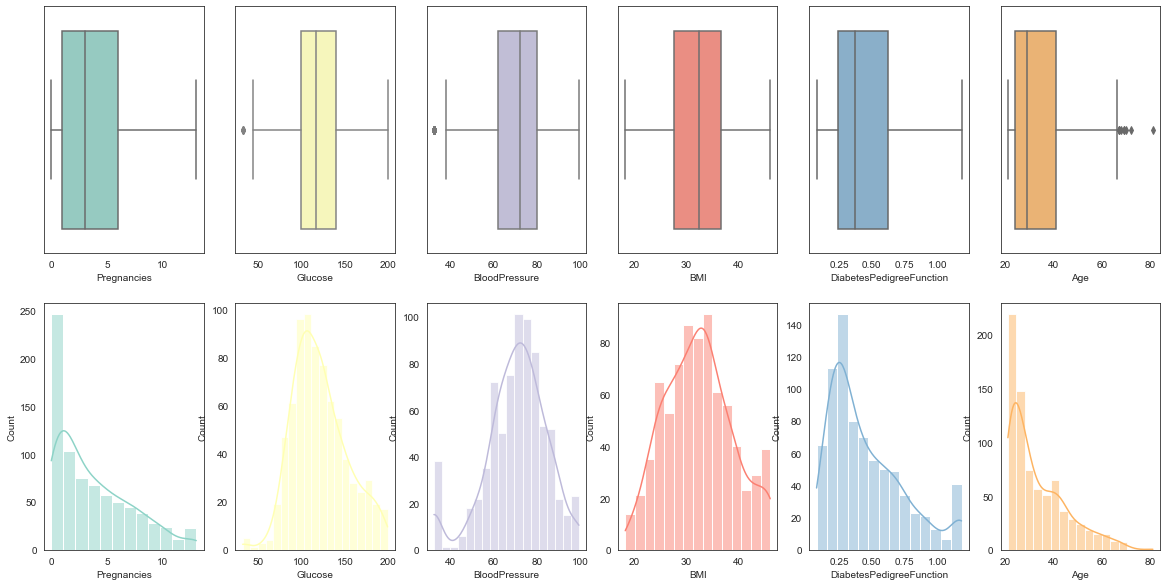

In [19]:
colors = sns.color_palette('Set3')
sns.set_style('white')
cols = list(df.columns)
cols.remove('Outcome')

fig, axs = plt.subplots(nrows=2, ncols=len(cols), figsize=(20, 10))
for i, col in enumerate(cols):
    sns.boxplot(data=df, x=col, ax=axs[0, i], color=colors[i])
    sns.histplot(data=df, x=col, ax=axs[1, i], color=colors[i], kde=True)


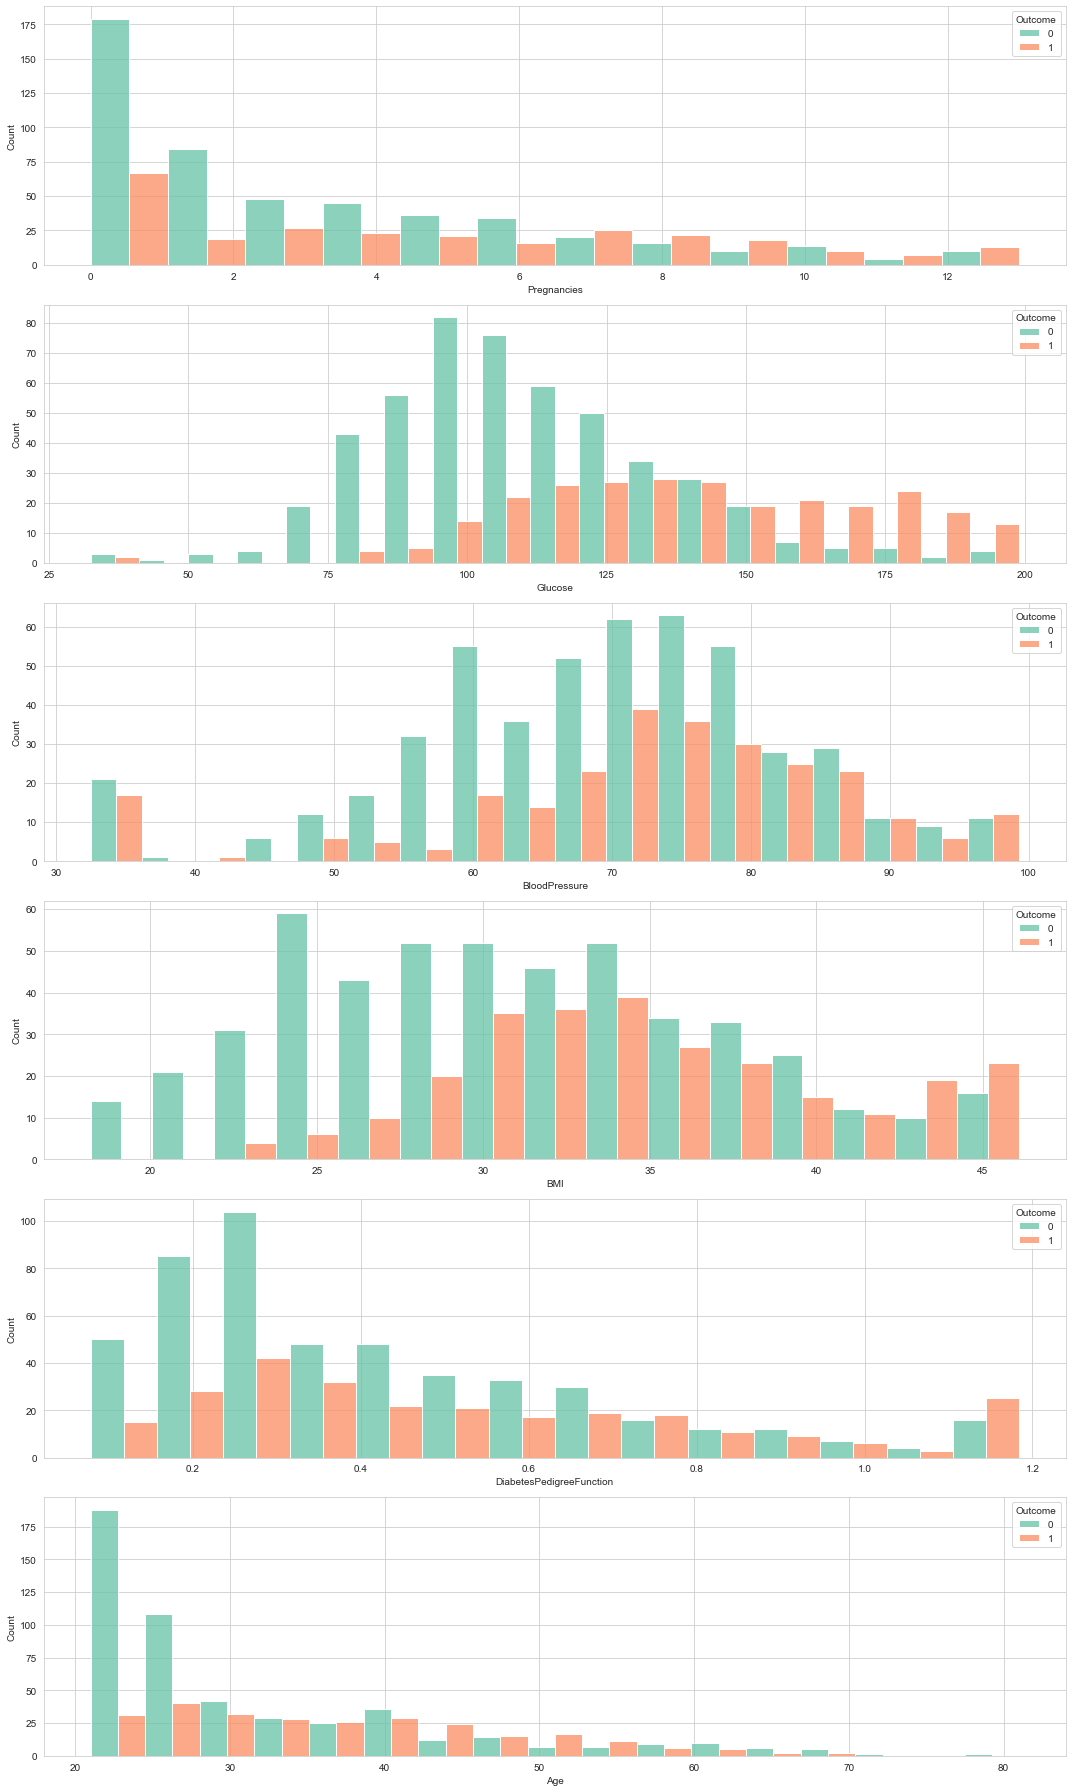

In [20]:
sns.set_palette('Set2')
sns.set_style('whitegrid')
fig, axs = plt.subplots(nrows=6, figsize=(15, 25))
for i, col in enumerate(cols):
    sns.histplot(data=df, x=col, hue='Outcome', ax=axs[i], multiple='dodge')
fig.tight_layout()


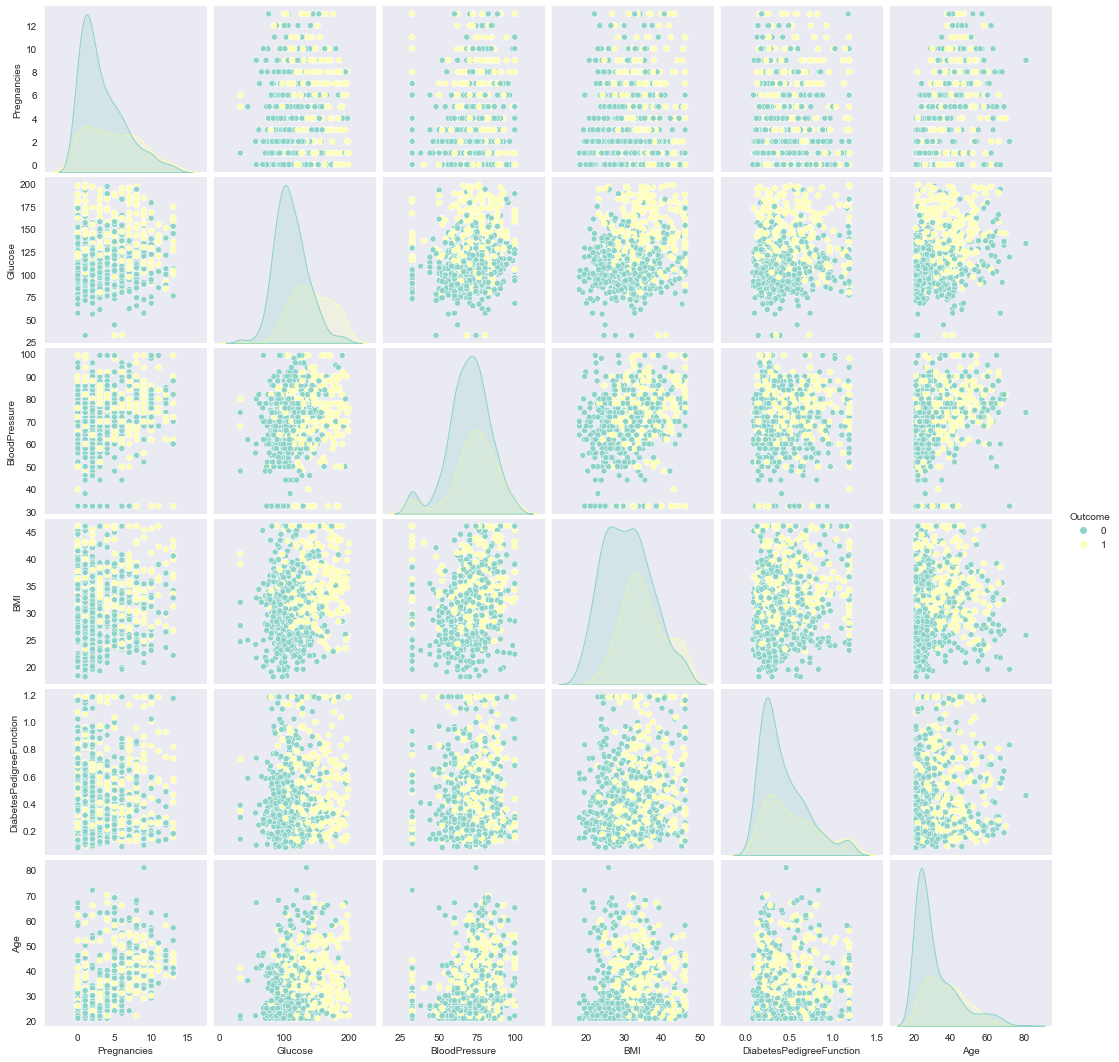

In [21]:
sns.set_palette('Set3')
sns.set_style('dark')
sns.pairplot(df, hue = 'Outcome')

In [22]:
df.describe()

,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.834635,121.105843,70.444666,32.319182,0.458304,33.240885,0.348958
std,3.336808,31.271580,14.264339,6.486881,0.284023,11.760232,0.476951
min,0.000000,32.457464,32.457464,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,32.400000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,36.600000,0.626250,41.000000,1.000000
max,13.000000,199.000000,99.320000,46.100000,1.184240,81.000000,1.000000


# Model selection

In [23]:
from sklearn.model_selection import train_test_split
cols = list(df.columns)
cols.remove('Outcome')
X = df[cols]
y = df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [24]:
sns.set_style('white')
sns.set_palette('tab10')
from sklearn.metrics import classification_report, plot_confusion_matrix
def model_accuracy(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    print(classification_report(y_test,pred))
    plot_confusion_matrix(model, X_train, y_train)


## Logistic Regression

              precision    recall  f1-score   support

           0       0.84      0.91      0.87       107
           1       0.74      0.60      0.66        47

    accuracy                           0.81       154
   macro avg       0.79      0.75      0.76       154
weighted avg       0.81      0.81      0.81       154



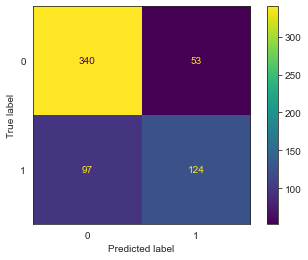

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model1 = LogisticRegression(max_iter=180)
model_accuracy(model1, X_train, X_test, y_train, y_test)


## Random Forest

              precision    recall  f1-score   support

           0       0.87      0.88      0.87       107
           1       0.72      0.70      0.71        47

    accuracy                           0.82       154
   macro avg       0.79      0.79      0.79       154
weighted avg       0.82      0.82      0.82       154



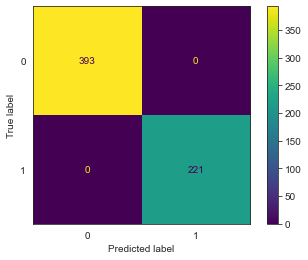

In [26]:
from sklearn.ensemble import RandomForestClassifier
model2 = RandomForestClassifier(random_state=2)
model2.fit(X_train, y_train)
model_accuracy(model2, X_train, X_test, y_train, y_test)


## Gaussian Naive Bayes

              precision    recall  f1-score   support

           0       0.86      0.88      0.87       107
           1       0.71      0.68      0.70        47

    accuracy                           0.82       154
   macro avg       0.79      0.78      0.78       154
weighted avg       0.82      0.82      0.82       154



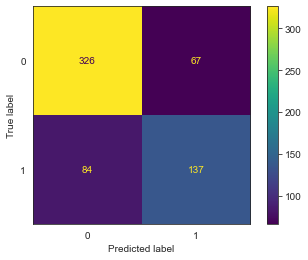

In [27]:
from sklearn.naive_bayes import GaussianNB
model3 = GaussianNB()
model3.fit(X_train, y_train)
model_accuracy(model3, X_train, X_test, y_train, y_test)


In [28]:
df.groupby('Outcome').mean()


,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,
0,3.298000,110.174745,69.325693,30.846034,0.419886,31.190000
1,4.835821,141.499683,72.532302,35.067593,0.529980,37.067164


# Model Building and prediction

In [29]:
def diabetes_prediction(model):
    preg = int(input('No. of pregnancies: '))
    glu = int(input('Plasma glucose concentration a 2 hours in an oral glucose tolerance test: '))
    b_pres = int(input('Diastolic blood pressure (mm Hg): '))
    bmi = float(input('Body mass index (weight in kg/(height in m)^2): ')) 
    pedi = float(input('Diabetes Pedigree Function: '))
    age = int(input('Age: '))
    
    values = [[preg,glu,b_pres,bmi,pedi, age]]
    pred = model.predict(values)
    print('\nPrediction: ')
    for i in pred:
        if i==0:
            print('Not Diabetic')
        elif i==1:
            print('Diabetic')
            
Rand_forest = RandomForestClassifier()
Rand_forest.fit(X,y)
diabetes_prediction(Rand_forest)
    


No. of pregnancies: 3
Plasma glucose concentration a 2 hours in an oral glucose tolerance test: 147
Diastolic blood pressure (mm Hg): 75
Body mass index (weight in kg/(height in m)^2): 35
Diabetes Pedigree Function: 0.45
Age: 28

Prediction: 
Not Diabetic
